In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('Train.csv')
df.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


### EDA

In [8]:
import pandas_profiling
df.profile_report()

<AxesSubplot:xlabel='time_spent', ylabel='Density'>

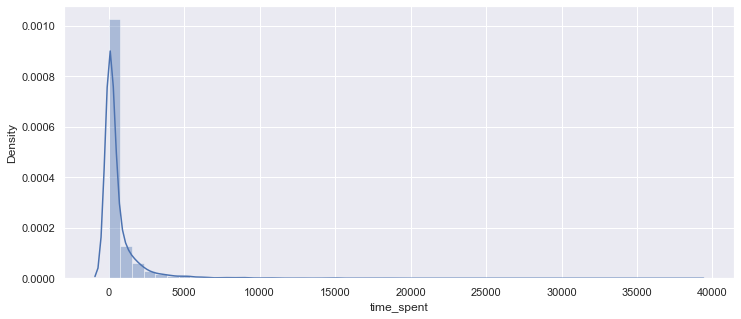

In [6]:
plt.figure(figsize=(12,5))
sns.distplot(df.time_spent)

In [2]:
# found that time spent has a long right skewness

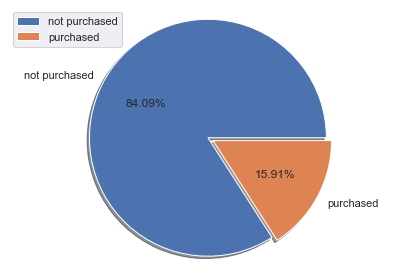

In [11]:
plt.pie(df.groupby('purchased').size(),labels=['not purchased','purchased'],explode=(0.05,0),radius=1,autopct='%0.2f%%',shadow=True)
plt.tight_layout()
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()

In [3]:
# among the total customers who have spend some time, only 16% have purchesed something

<AxesSubplot:xlabel='added_in_cart', ylabel='count'>

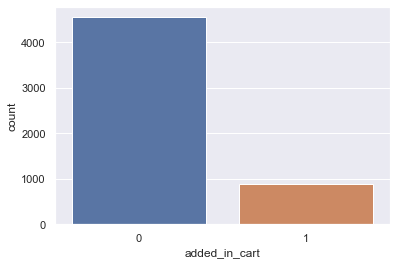

In [12]:
sns.countplot(df.added_in_cart)

In [4]:
# among the 5500 customers who have spend some time, only approx 900 have added something in their cart

In [35]:
df.groupby('device_details').size()

device_details
Android Phone - Android        326
Android Phone - MobileWeb       54
Android Phone - Web             86
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Android Tablet - Web           203
Desktop - Chrome               815
Desktop - Firefox              234
Desktop - IE                   292
Desktop - Safari               313
Other - Other                  185
Unknown - MobileWeb             87
iPad - Web                     289
iPad - iOS                      77
iPhone - MobileWeb             277
iPhone - Web                   665
iPhone - iOS                  1515
dtype: int64

### Feature engineering

In [4]:
df['device_details_browser']=df.device_details.apply(lambda x: x.split('-')[-1])
df['device_details']=df.device_details.apply(lambda x: x.split('-')[0])

In [5]:
df['device_OS']=df.device_details.replace({'Desktop ':'Windows','iPhone ':'MACOS','iPad ':'MACOS','Android Phone ':'Andoid','Android Tablet ':'Andoid','Unknown ':'Other '})
df.device_details=df.device_details.replace({'iPhone ':'Smart Phone','Android Phone ':'Smart Phone','Android Tablet ':'Smart Phone','iPad ':'Smart Phone','Unknown ':'Other '})

<AxesSubplot:xlabel='device_details', ylabel='count'>

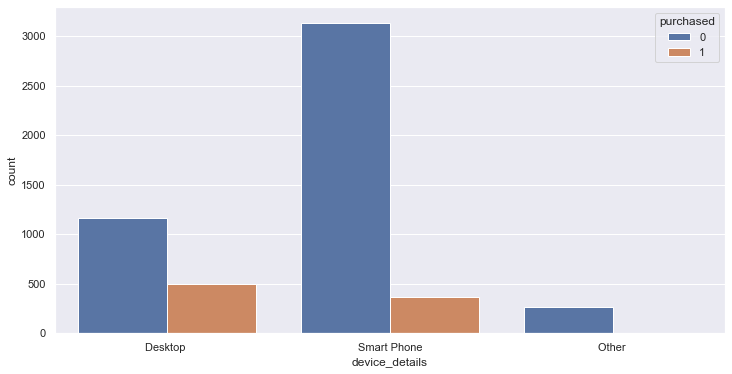

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(df.device_details,hue=df.purchased)

In [7]:
# among all the customers majority of buyers access the website thorugh smart phones

<AxesSubplot:xlabel='device_details_browser', ylabel='count'>

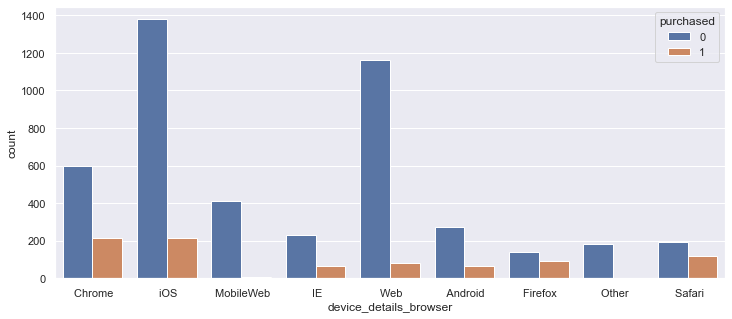

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(df.device_details_browser,hue=df.purchased)

<AxesSubplot:xlabel='device_OS', ylabel='count'>

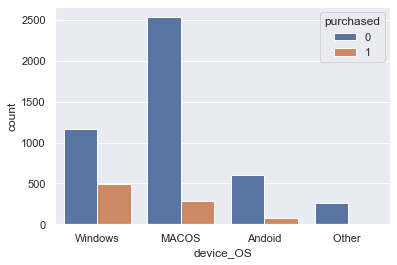

In [41]:
sns.countplot(df.device_OS,hue=df.purchased)

In [8]:
# mac os users are higher

In [6]:
df['date']=pd.to_datetime(df['date'])

In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.week
df['quarter'] = df['date'].dt.quarter
df['weekday'] = df['date'].dt.weekday
df['weekday']=df['weekday'].apply(lambda x: 1 if x<5 else 0)

<AxesSubplot:xlabel='month', ylabel='count'>

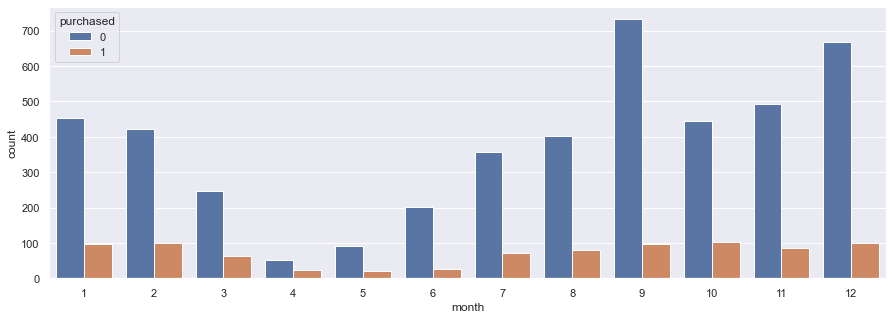

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(df.month,hue=df.purchased)

<AxesSubplot:xlabel='week', ylabel='count'>

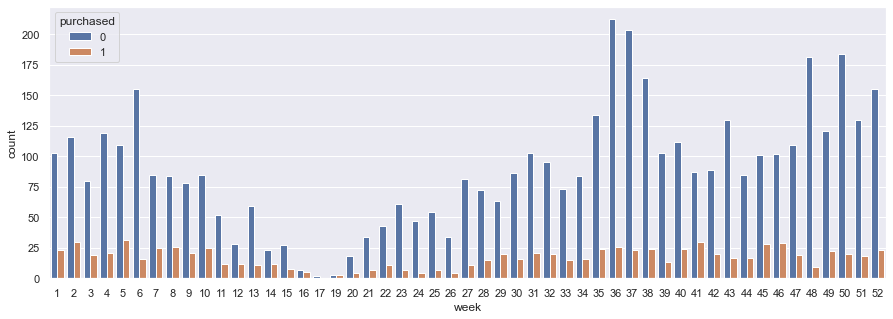

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(df.week,hue=df.purchased)

<AxesSubplot:xlabel='device_details'>

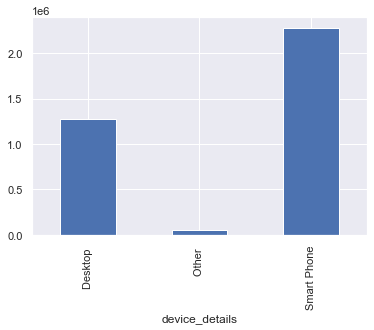

In [16]:
df.groupby('device_details')['time_spent'].sum().plot(kind='bar')

In [9]:
# maximum time spent through smart phones

In [17]:
df.columns

Index(['session_id', 'session_number', 'client_agent', 'device_details',
       'date', 'purchased', 'added_in_cart', 'checked_out', 'time_spent',
       'device_details_browser', 'device_OS', 'year', 'month', 'week',
       'quarter', 'weekday'],
      dtype='object')

<AxesSubplot:xlabel='quarter'>

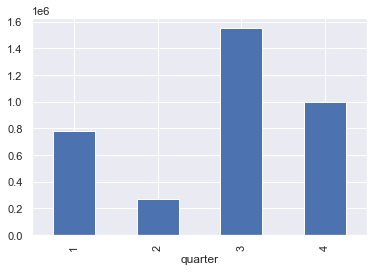

In [18]:
df.groupby('quarter')['time_spent'].sum().plot(kind='bar')

In [10]:
# in the second quarter, minimum number of time spent

<AxesSubplot:xlabel='device_OS'>

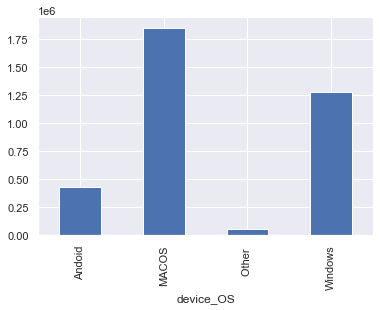

In [19]:
df.groupby('device_OS')['time_spent'].sum().plot(kind='bar')

In [177]:
import datetime as dt
today_date = dt.date(2020,4,23)

In [178]:
df['date'] = pd.DatetimeIndex(df.date).date

In [179]:
df['recency']=df.date.apply(lambda x : (today_date - x).days)

<AxesSubplot:>

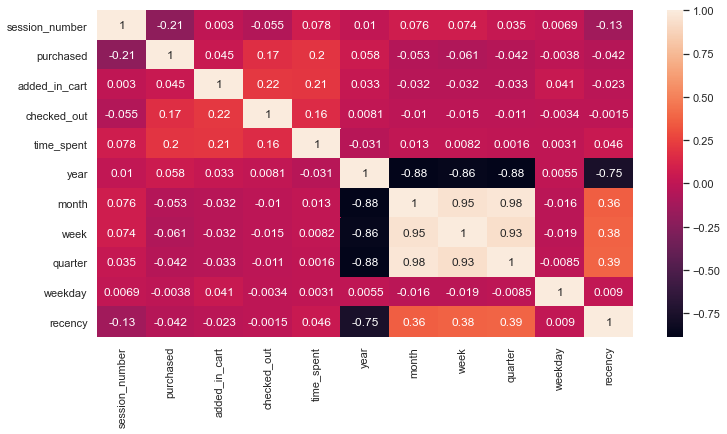

In [147]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [180]:
df=df.drop(['session_id','client_agent','date'],axis=1)

In [181]:
df.head()

,session_number,device_details,purchased,added_in_cart,checked_out,time_spent,device_details_browser,device_OS,year,month,week,quarter,weekday,recency
0,715,Desktop,1,0,0,236.886,Chrome,Windows,2020,1,4,1,1,92
1,55,Smart Phone,1,0,0,1277.455,iOS,MACOS,2020,2,9,1,1,56
2,11,Smart Phone,0,0,0,21.704,MobileWeb,MACOS,2019,8,31,3,1,266
3,2794,Desktop,0,1,0,455.201,IE,Windows,2019,12,1,4,1,115
4,3674,Smart Phone,0,0,0,1164.877,Web,MACOS,2019,9,37,3,1,226


In [183]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

cat_col=['device_details','device_details_browser','purchased','added_in_cart','checked_out','device_details_browser','device_OS','year','month','week','quarter','weekday']

for i in cat_col:
    df[i]=label.fit_transform(df[i])

In [148]:
num_var=['time_spent','recency']

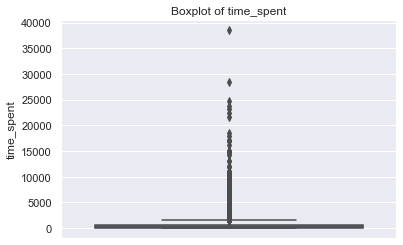

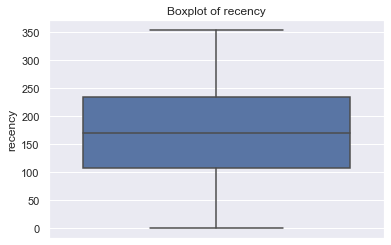

In [149]:
# outlier treatment
for i in num_var:
    sns.boxplot(y=i,data=df)
    plt.title('Boxplot of '+i)
    plt.show()

In [111]:
df.shape

(5429, 17)

In [185]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df[['time_spent']]=df[['time_spent']][~((df[['time_spent']] < (Q1 - 1.5*IQR))| (df[['time_spent']]> (Q3 + 1.5*IQR))).any(axis=1)]

In [186]:
df.isnull().sum()

session_number              0
device_details              0
purchased                   0
added_in_cart               0
checked_out                 0
time_spent                670
device_details_browser      0
device_OS                   0
year                        0
month                       0
week                        0
quarter                     0
weekday                     0
recency                     0
dtype: int64

In [187]:
from sklearn.impute import KNNImputer
knn=KNNImputer()
df=knn.fit_transform(df)

In [188]:
df=pd.DataFrame(df)

In [189]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [190]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,715.0,0.0,1.0,0.0,0.0,236.8860,1.0,3.0,1.0,0.0,3.0,0.0,1.0,92.0
1,55.0,2.0,1.0,0.0,0.0,1277.4550,8.0,1.0,1.0,1.0,8.0,0.0,1.0,56.0
2,11.0,2.0,0.0,0.0,0.0,21.7040,4.0,1.0,0.0,7.0,29.0,2.0,1.0,266.0
3,2794.0,0.0,0.0,1.0,0.0,455.2010,3.0,3.0,0.0,11.0,0.0,3.0,1.0,115.0
4,3674.0,2.0,0.0,0.0,0.0,1164.8770,7.0,1.0,0.0,8.0,35.0,2.0,1.0,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,627.0,2.0,0.0,0.0,0.0,20.6010,7.0,1.0,0.0,10.0,45.0,3.0,1.0,155.0
5425,6710.0,2.0,0.0,0.0,0.0,230.3924,8.0,1.0,0.0,8.0,37.0,2.0,1.0,210.0
5426,198.0,0.0,0.0,0.0,0.0,22.7110,1.0,3.0,0.0,7.0,31.0,2.0,1.0,254.0
5427,913.0,1.0,0.0,0.0,0.0,20.8440,4.0,2.0,0.0,5.0,23.0,1.0,1.0,310.0


In [191]:
x=df.drop(5,axis=1)
y=df[5]

In [163]:
x

,0,1,2,3,4,6,7,8,9,10,11,12,13
0,715.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0,3.0,0.0,1.0,92.0
1,55.0,2.0,1.0,0.0,0.0,8.0,1.0,1.0,1.0,8.0,0.0,1.0,56.0
2,11.0,2.0,0.0,0.0,0.0,4.0,1.0,0.0,7.0,29.0,2.0,1.0,266.0
3,2794.0,0.0,0.0,1.0,0.0,3.0,3.0,0.0,11.0,0.0,3.0,1.0,115.0
4,3674.0,2.0,0.0,0.0,0.0,7.0,1.0,0.0,8.0,35.0,2.0,1.0,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,627.0,2.0,0.0,0.0,0.0,7.0,1.0,0.0,10.0,45.0,3.0,1.0,155.0
5425,6710.0,2.0,0.0,0.0,0.0,8.0,1.0,0.0,8.0,37.0,2.0,1.0,210.0
5426,198.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,7.0,31.0,2.0,1.0,254.0
5427,913.0,1.0,0.0,0.0,0.0,4.0,2.0,0.0,5.0,23.0,1.0,1.0,310.0


In [192]:
x[0]=x[0].apply(lambda x:np.log(x+1))
y=y.apply(lambda x:np.log(x+1))

In [193]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

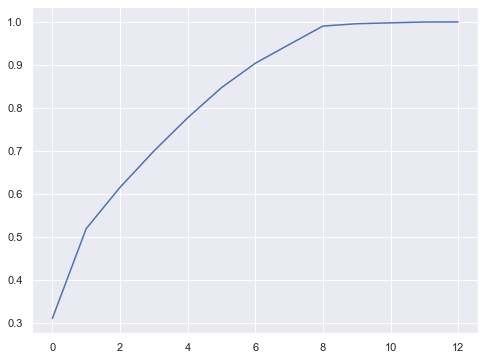

In [194]:
# dimentionality reduction
from sklearn.decomposition import PCA
pca=PCA()
x=pca.fit_transform(x)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [195]:
pca=PCA(n_components=9)
new_data=pca.fit_transform(x)

In [196]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(new_data,y)

### model building

In [200]:
from sklearn.metrics import mean_squared_error

In [203]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
print('RMSE :',np.sqrt(mean_squared_error(y_test,pred)))

RMSE : 1.1914356311633334
